# Question 2

## (a)

**ANSWER:** In Gaussian Naïve Bayes, P(wine attribute x∣cultivar) is typically represented by a Gaussian (normal) distribution for each attribute within each class (cultivar). It has the following form:

$$P(x | \text{cultivar}) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$
where
+ $x$ is the value of the wine attribute.
+ $\mu$ is the mean of the attribute for this cultivar.
+ $\sigma$ is the standard deviation of the attribute for this cultivar.

The Gaussian distribution is chosen because the Naïve Bayes classifier assumes that the continuous values associated with each class are distributed according to the Gaussian distribution. We can indeed think of the Central Limit Theorem, which implies that for a high number of samples, the distribution of a random variable can be approximated by a Gaussian distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
# Note: you can modify the template, define new attributes or 
# functions as you want
class NaiveBayesClassifier():
    def __init__(self):
        # classes
        self.cls = []
        # statistics of features that belongs to different classes
        self.cls_stats = []
        # prior probablity, i.e. P(C)
        self.prior_prob = []
        
        self.trained = False
    
    @staticmethod
    def gaussian(X, mean, std):
        """
        Gaussian probability distribution function
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        mean: numpy.ndarray
            Average of each feature, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature, shape (n_features,)
            
        Returns
        -------
        prob: numpy.ndarray
            Probability of each feature, shape (n_samples, n_features)
        """
        return np.exp(- ((X - mean)**2) / (2 * std**2)) / np.sqrt(2 * np.pi * std**2)
    
    @staticmethod
    def calculate_statistics(X):
        """
        Calculate the average and standard deviation of each feature 
        based on the input data
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
            
        Returns
        -------
        mean: numpy.ndarray
            Average of each feature, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature, shape (n_features,)
        """
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return mean, std
    
    @staticmethod
    def calculate_prob(X, mean, std):
        """
        Calculate the prior probability that the input features belong to a specific class,
        i.e. P(X | C) = \prod_i P(X_i | C)
        which is defined by the statistics of features in that class.
        
        Gaussian probability distribution function
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        mean: numpy.ndarray
            Average of each feature in the specific class, shape (n_features,)
        std: numpy.ndarray
            Standard deviation of each feature in the specific class, shape (n_features,)
            
        Returns
        -------
        prob: numpy.ndarray
            Probability that the features belong to a specific class, shape (n_samples,)
        """
        return np.prod(NaiveBayesClassifier.gaussian(X, mean, std), axis=1)
    
    def fit(self, X, y):
        """
        Train the classifier by calculating the statistics of different features in each class
        
        Parameters
        ----------
        X: numpy.ndarray
            Input data, shape (n_samples, n_features)
        y: numpy.ndarray
            Labels (the actual classes), shape (n_samples)
        """
        ndata = y.shape[0]
        self.cls = np.unique(y)
        for i in range(len(self.cls)):
            cls_filter = (y == self.cls[i])
            cls_filter = np.reshape(cls_filter, (1, -1))[0]
            self.prior_prob.append(np.sum(cls_filter) / ndata)
            self.cls_stats.append(self.calculate_statistics(X[cls_filter]))
        self.trained = True
            
    def predict(self, X):
        # Do the prediction by outputing the class that has highest probability
        assert self.trained, f"The classfier has not been trained. Call {self.__class__.__name__}.fit first"
        probs = []
        for i in range(len(self.cls)):
            mean_i, std_i = self.cls_stats[i]
            cls_probs = self.calculate_prob(X, mean_i, std_i)
            prior_prob = self.prior_prob[i]
            probs.append(cls_probs * prior_prob)
        return self.cls[np.argmax(probs, axis=0)]

We can load the dataset:

In [3]:
df = pd.read_csv("../Datasets/wines.csv")
# Create X and y
X = df[['Alcohol %']].values
y = df["ranking"].values

# Create the filter on cultivar 1
cultivar1_filter = (y == 1)
cultivar1_filter = np.reshape(cultivar1_filter, (1, -1))[0]

# Compute the mean and std for this class
mean, std = NaiveBayesClassifier.calculate_statistics(X[cultivar1_filter])
print(f"mean: {round(mean[0], 2)}, std: {round(std[0], 2)}")

mean: 13.74, std: 0.46


In [4]:
# Predict for an alcohol % of 13
x_13 = np.array([[13.0]])

print(f"Probability of having an Alcohol % of 13 : {round(NaiveBayesClassifier.gaussian(x_13, mean, std)[0][0] * 100, 2)}%")

Probability of having an Alcohol % of 13 : 23.24%


**ANSWER:** Hence, the chance of it having an Alcohol % of 13 according to the probability distribution function is around 23.24%.

## (b)

Preprocess data:
+ Select relevant descriptors (columns other than "Start assignment" and "ranking"). Should get *178 datapoints and 13 features*.
+ Normalize the data with `StandardScaler` in sklearn.
+ The labels are in the "ranking" column.

*For debugging*: The accuracy could reach over 95\%.

We can import the dataset.

In [5]:
df = pd.read_csv("../Datasets/wines.csv")
df.head()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# normalize the data
features = df.drop(['Start assignment', 'ranking'], axis=1).values
X = StandardScaler().fit_transform(features)
y = df["ranking"].values

# we verify that we have the good dimensions (178 datapoints and 13 features)
assert X.shape == (178, 13), f"Warning, X's dimensions are incorrect ({X.shape[0]} datapoints and {X.shape[1]} features)!"

In [8]:
def calculate_accuracy(model, X, y):
    y_pred = model.predict(X)
    acc = np.sum(y_pred == y) / len(y)
    return acc

def KFoldNaiveBayes(k, X, y):
    """
    K-Fold Cross Validation for Naive Bayes Classifier
    
    Parameters
    ---------
    k: int
        Number of folds
    X: numpy.ndarray
        Input data, shape (n_samples, n_features)
    y: numpy.ndarray
        Class labels, shape (n_samples)
    """
    kf = KFold(n_splits=k, shuffle=True)
    train_acc_all = []
    test_acc_all = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = NaiveBayesClassifier()

        model.fit(X_train, y_train)
        
        # Report prediction accuracy for this fold
        # use the calculate_accuracy() function
        train_acc = calculate_accuracy(model, X_train, y_train)
        train_acc_all.append(train_acc)
        test_acc = calculate_accuracy(model, X_test, y_test)
        test_acc_all.append(test_acc)
        print(f"Train accuracy: {round(train_acc  * 100, 2)}%")
        print(f"Test accuracy: {round(test_acc * 100, 2)}%")
    
    # report mean & std for the training/testing accuracy
    print("Final results:")
    print(f"\t-> Training accuracy: {round(np.mean(train_acc_all) * 100, 2)}% +/- {round(np.std(train_acc_all)  * 100, 2)}")
    print(f"\t-> Testing accuracy: {round(np.mean(test_acc_all) * 100, 2)}% +/- {round(np.std(test_acc_all)  * 100, 2)}")

In [9]:
KFoldNaiveBayes(k=3, X=X, y=y)

Train accuracy: 99.15%
Test accuracy: 98.33%
Train accuracy: 98.32%
Test accuracy: 94.92%
Train accuracy: 98.32%
Test accuracy: 96.61%
Final results:
	-> Training accuracy: 98.6% +/- 0.39
	-> Testing accuracy: 96.62% +/- 1.4


# Question 3

## (a)

In [10]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [11]:
# Define your model here
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__() # initialize first the nn.Module class
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.layers = nn.Sequential(
            nn.Linear(self.input_dim, self.output_dim),
            nn.ReLU(),
            nn.Softmax(dim=1)
        )
        
    def forward(self, X):
        return self.layers(X)
        
class NetWithoutSoftmax(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__() # initialize first the nn.Module class
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.layers = nn.Sequential(
            nn.Linear(self.input_dim, self.output_dim),
            nn.ReLU(),
        )
        
    def forward(self, X):
        return self.layers(X)

In [12]:
features = df.drop(['Start assignment', 'ranking'], axis=1).values
X = StandardScaler().fit_transform(features)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(df['ranking'].values - 1)

# transform X and y into tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(df['ranking'].values - 1, dtype=torch.float32)

/var/folders/8w/hjszh63d3c73r_p9_djpkmkh0000gn/T/ipykernel_32683/2528682528.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)


In [13]:
model = Net(input_dim=13, output_dim=3)
print(f"output (first 10 rows): {model(X)[:10]}")

output (first 10 rows): tensor([[0.4291, 0.2854, 0.2854],
        [0.4730, 0.3223, 0.2047],
        [0.3333, 0.3333, 0.3333],
        [0.3343, 0.3328, 0.3328],
        [0.3333, 0.3333, 0.3333],
        [0.5178, 0.2411, 0.2411],
        [0.3509, 0.3738, 0.2753],
        [0.3309, 0.3382, 0.3309],
        [0.3999, 0.3000, 0.3000],
        [0.3333, 0.3333, 0.3333]], grad_fn=<SliceBackward0>)


In [14]:
model_without_softmax = NetWithoutSoftmax(input_dim=13, output_dim=3)
print(f"output (first 10 rows): {model_without_softmax(X)[:10]}")

output (first 10 rows): tensor([[0.4992, 0.0000, 0.8628],
        [0.5087, 0.1429, 0.2481],
        [0.2447, 0.2601, 0.4278],
        [0.2775, 0.0738, 0.1608],
        [0.3721, 0.2248, 0.0000],
        [0.5417, 0.2138, 0.5476],
        [0.3981, 0.0000, 0.8007],
        [0.5721, 0.0000, 0.0000],
        [0.5942, 0.0940, 0.0000],
        [0.2320, 0.0000, 0.1017]], grad_fn=<SliceBackward0>)


**ANSWER:** 

When we pass the data through the network with a softmax layer at the output, the output we get is a probability distribution across the classes, which can be directly interpreted. 

Without the softmax layer, the output consists of raw scores that do not necessarily sum to one and cannot be directly interpreted as probabilities.

## (b)

*For debugging*: The accuracy could reach over 95\% if the hyperparameters are tuned properly.

In [15]:
def train_and_val(model, X_train, y_train, epochs, draw_curve=True):
    """
    Further split the data into acutal train and validation subsets.
    """
    # Define your loss function, optimizer
    loss_func = nn.CrossEntropyLoss() # because it is a classification task
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    
    X_train_in, X_val, y_train_in, y_val = train_test_split(X, y, test_size=0.2)
    
    val_losses = []
    lowest_val_loss = np.inf
    
    weights = {}
    for i in range(epochs):
        # Compute the loss and do back-propagation
        y_train_pred = model(X_train_in)

        y_train_in = y_train_in.long()  # Assuming y_train_in is a tensor
        y_val = y_val.long()  # Assuming y_val is a tensor
        
        loss = loss_func(y_train_pred, y_train_in)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Compute validation loss and keep track of the lowest val loss
        with torch.no_grad():
            val_loss = loss_func(model(X_val), y_val)
        
        if val_loss < lowest_val_loss:
            lowest_val_loss = val_loss
            weights = model.state_dict() 
        val_losses.append(val_loss)
        
    # The final number of epochs is when the minimum error in validation set occurs    
    final_epochs = np.argmin(val_losses)
    print("Number of epochs with lowest validation:", final_epochs)
    print(f"Validation loss: {np.min(val_losses)}")
    # Recover the model weights
    model.load_state_dict(weights)

    if draw_curve:
        fig, ax = plt.subplots(1, 1, figsize=(5, 4), constrained_layout=True)
        ax.plot(np.arange(epochs), val_losses, label='Validation loss')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()
    
    return model


def calculate_accuracy_nn(model, X, y):
    with torch.no_grad():
        y_pred = torch.argmax(model(X), axis=1)
        acc = torch.sum(y_pred == y) / len(y)
    return acc.detach().numpy()


def KFoldNN(k, X, y, epochs=500):
    """
    K-Fold Validation for Neural Network
    
    Parameters
    ---------
    k: int
        Number of folds
    X: numpy.ndarray
        Input data, shape (n_samples, n_features)
    y: numpy.ndarray
        Class labels, shape (n_samples)
    epochs: int
        Number of epochs during training
    """
    # K-Fold
    kf = KFold(n_splits=k, shuffle=True)
    train_acc_all = []
    test_acc_all = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # further do a train/valid split on X_train
        model = train_and_val(Net(input_dim=X.shape[1], output_dim=len(np.unique(y))), X_train, y_train, epochs=epochs, draw_curve=True)
        
        # Report prediction accuracy for this fold
        # use calculate_accuracy_nn() function
        train_acc = calculate_accuracy_nn(model, X_train, y_train)
        train_acc_all.append(train_acc)
        test_acc = calculate_accuracy_nn(model, X_test, y_test)
        test_acc_all.append(test_acc)
        print(f"Train accuracy: {round(train_acc  * 100, 2)}%")
        print(f"Test accuracy: {round(test_acc * 100, 2)}%")
    
    # report mean & std for the training/testing accuracy
    print("Final results:")
    print(f"\t-> Training accuracy: {round(np.mean(train_acc_all) * 100, 2)}% +/- {round(np.std(train_acc_all)  * 100, 2)}")
    print(f"\t-> Testing accuracy: {round(np.mean(test_acc_all) * 100, 2)}% +/- {round(np.std(test_acc_all)  * 100, 2)}")

Number of epochs with lowest validation: 999
Validation loss: 0.5686408877372742
Train accuracy: 100.0%
Test accuracy: 98.33%
Number of epochs with lowest validation: 999
Validation loss: 0.5721571445465088
Train accuracy: 99.16%
Test accuracy: 100.0%
Number of epochs with lowest validation: 999
Validation loss: 0.5765390396118164
Train accuracy: 99.16%
Test accuracy: 100.0%
Final results:
	-> Training accuracy: 99.44% +/- 0.4
	-> Testing accuracy: 99.44% +/- 0.79


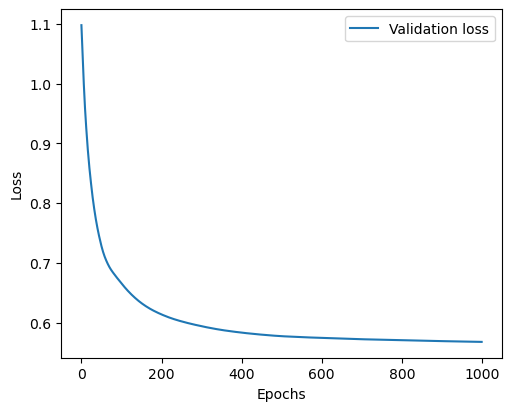

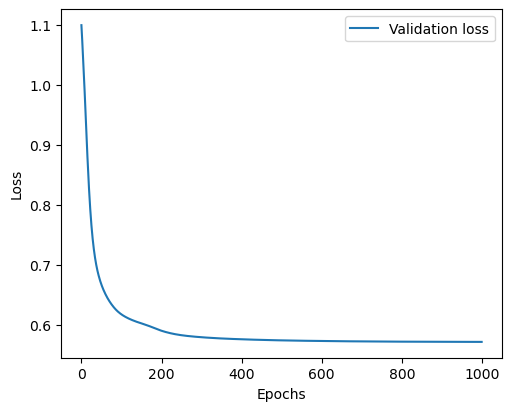

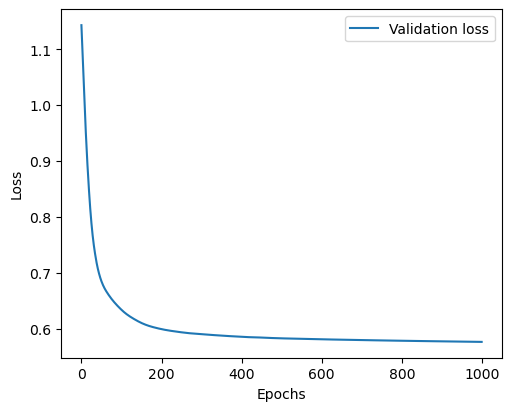

In [16]:
KFoldNN(k=3, X=X, y=y, epochs=1000)

**ANSWER:** The prediction seems better relative to problem 2 if the number of epochs is sufficient. We use many more parameters than for problem 2. The model for the problem 2 still works very well.